In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import cv2 as cv2
from statistics import mean, median

Here we have more than 4 million data images which is divided into two main components, Firstly we have the molecular Images and Secondaly we have the InChI values of every molecular image store in the train_labels along with corresponding Image_ID.
The whole data is broken down into 2.4 million training images alog their labels and 1.6 million testsing images.

Files
train/ - the training images, arranged in a 3-level folder structure by image_id
test/ - the test images, arranged in the same folder structure as train/
train_labels.csv - ground truth InChi labels for the training images

In [3]:
## READ TRAINING DATA
train_data_img_path = "C:/Users/sagar/Downloads/DSEM/input/bms-molecular-translation/train/"
train_data_lbl_path = "C:/Users/sagar/Downloads/DSEM/input/bms-molecular-translation/train_labels.csv"
train_data_lbls = pd.read_csv(train_data_lbl_path, index_col=0)
train_data_lbls.head(2)

,InChI
image_id,
000011a64c74,InChI=1S/C13H20OS/c1-9(2)8-15-13-6-5-10(3)7-12...
000019cc0cd2,InChI=1S/C21H30O4/c1-12(22)25-14-6-8-20(2)13(1...


In [4]:
def get_training_img_data(img_id, img_lbl):
    plot.figure(figsize=(10, 8))
    image = cv2.imread(get_img_path(img_id))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plot.imshow(image)
    plot.title(f"{img_lbl}", fontsize=14)
    plot.axis("off")
    plot.show()

In [5]:
def visualize_train_batch(img_ids, labels):
    plot.figure(figsize=(16, 12))
    for ind, (img_id, label) in enumerate(zip(img_ids, labels)):
        plot.subplot(3, 3, ind + 1)
        image = cv2.imread(get_img_path(img_id))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plot.imshow(image)
        plot.title(f"{label[:30]}...", fontsize=10)
        plot.axis("off")
    plot.show()

In [6]:
def get_img_path(i: str) -> str:
    return train_data_img_path + "{}/{}/{}/{}.png".format(i[0], i[1], i[2], i)

# Data Visualization
Here we are visualizing any random eight chemical images with their International Chemical Identifier(InChI) formulas using the defined functions.

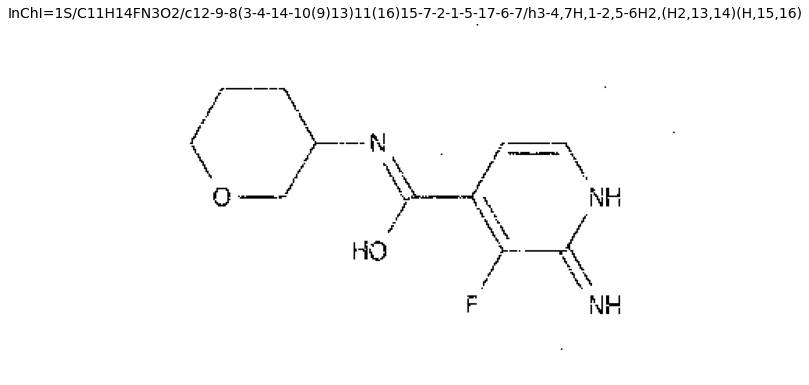

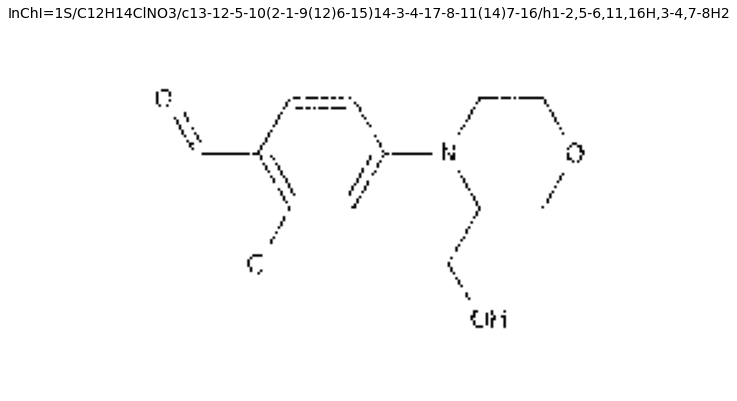

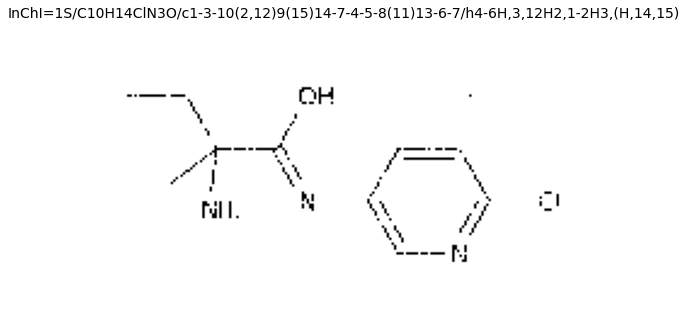

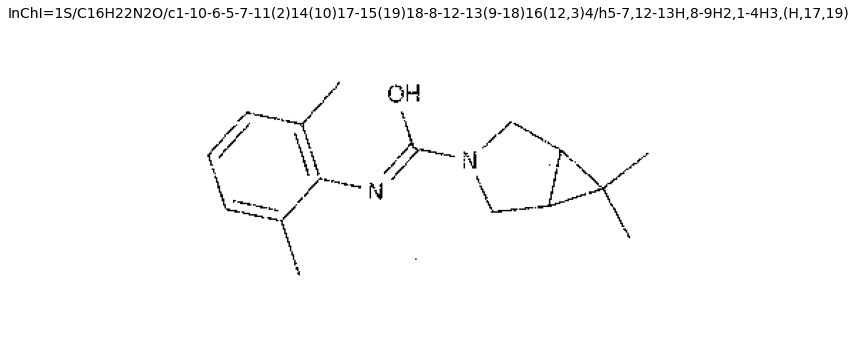

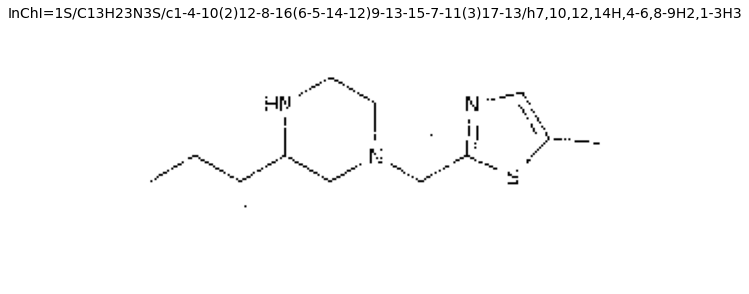

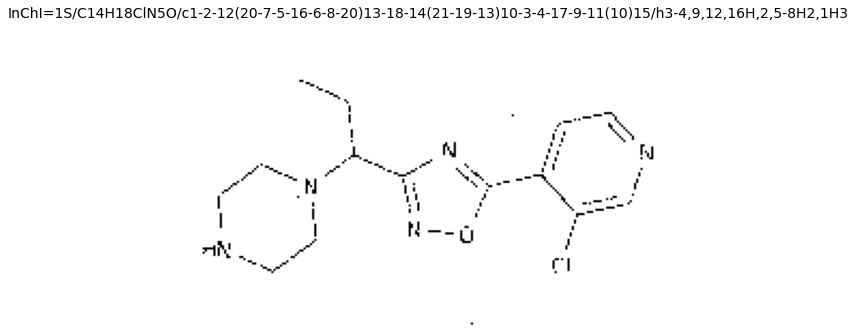

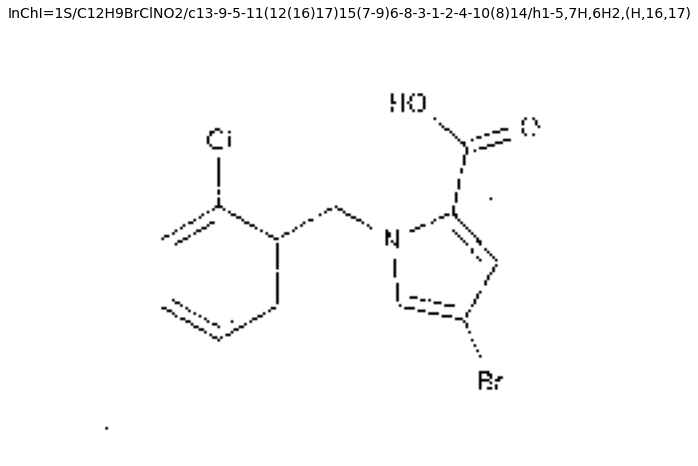

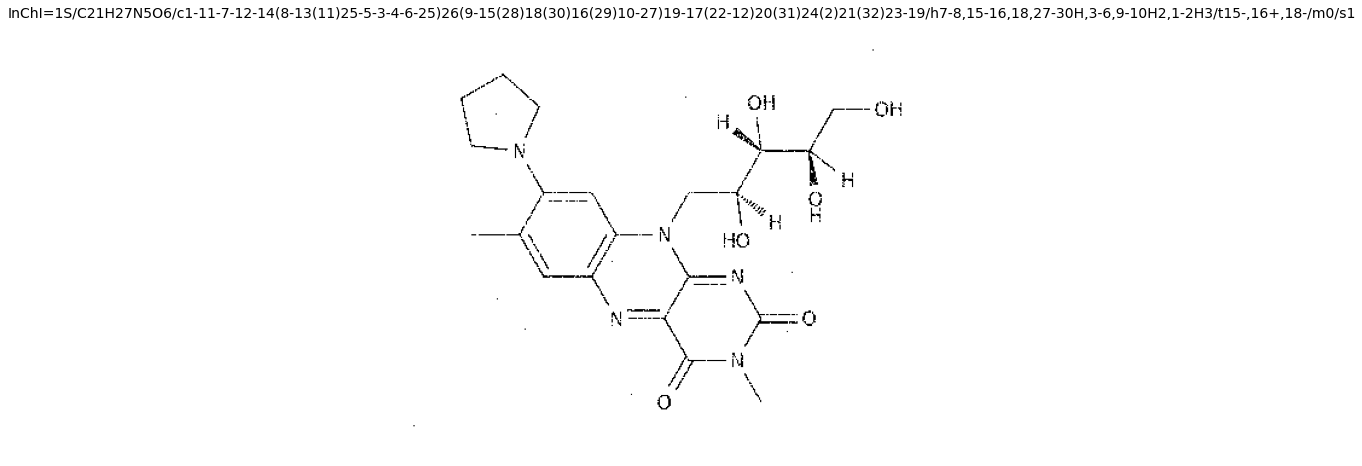

In [7]:
sample_row = train_data_lbls.sample(8)
for i in range(8):
    get_training_img_data(sample_row.index[i], sample_row["InChI"][i])

Displaying the data characterictics by calculating the mean, median and max of the character count of the data.

In [8]:
samples = []
sample_row_1 = train_data_lbls
sizes = []
for i in sample_row_1["InChI"]:
    sizes.append(len(i.replace("InChI=","")))

print("There are %d number of labels in the training dataset" % len(sizes))
print("\nSample set of training labels: ")
for i in sample_row["InChI"]:
    print(i)
    samples.append(len(i.replace("InChI=","")))
print("\nString length of labels in sample set of training labels are: ", samples)
print("\nThe mean of character length of labels in training dataset is %f " % mean(sizes))
print("\nThe median of character length of labels in training dataset is %f " % median(sizes))
print("\nThe maximum character length of labels in training dataset is %f " % max(sizes))

There are 2424186 number of labels in the training dataset

Sample set of training labels: 
InChI=1S/C11H14FN3O2/c12-9-8(3-4-14-10(9)13)11(16)15-7-2-1-5-17-6-7/h3-4,7H,1-2,5-6H2,(H2,13,14)(H,15,16)
InChI=1S/C12H14ClNO3/c13-12-5-10(2-1-9(12)6-15)14-3-4-17-8-11(14)7-16/h1-2,5-6,11,16H,3-4,7-8H2
InChI=1S/C10H14ClN3O/c1-3-10(2,12)9(15)14-7-4-5-8(11)13-6-7/h4-6H,3,12H2,1-2H3,(H,14,15)
InChI=1S/C16H22N2O/c1-10-6-5-7-11(2)14(10)17-15(19)18-8-12-13(9-18)16(12,3)4/h5-7,12-13H,8-9H2,1-4H3,(H,17,19)
InChI=1S/C13H23N3S/c1-4-10(2)12-8-16(6-5-14-12)9-13-15-7-11(3)17-13/h7,10,12,14H,4-6,8-9H2,1-3H3
InChI=1S/C14H18ClN5O/c1-2-12(20-7-5-16-6-8-20)13-18-14(21-19-13)10-3-4-17-9-11(10)15/h3-4,9,12,16H,2,5-8H2,1H3
InChI=1S/C12H9BrClNO2/c13-9-5-11(12(16)17)15(7-9)6-8-3-1-2-4-10(8)14/h1-5,7H,6H2,(H,16,17)
InChI=1S/C21H27N5O6/c1-11-7-12-14(8-13(11)25-5-3-4-6-25)26(9-15(28)18(30)16(29)10-27)19-17(22-12)20(31)24(2)21(32)23-19/h7-8,15-16,18,27-30H,3-6,9-10H2,1-2H3/t15-,16+,18-/m0/s1

String length of labels in sa

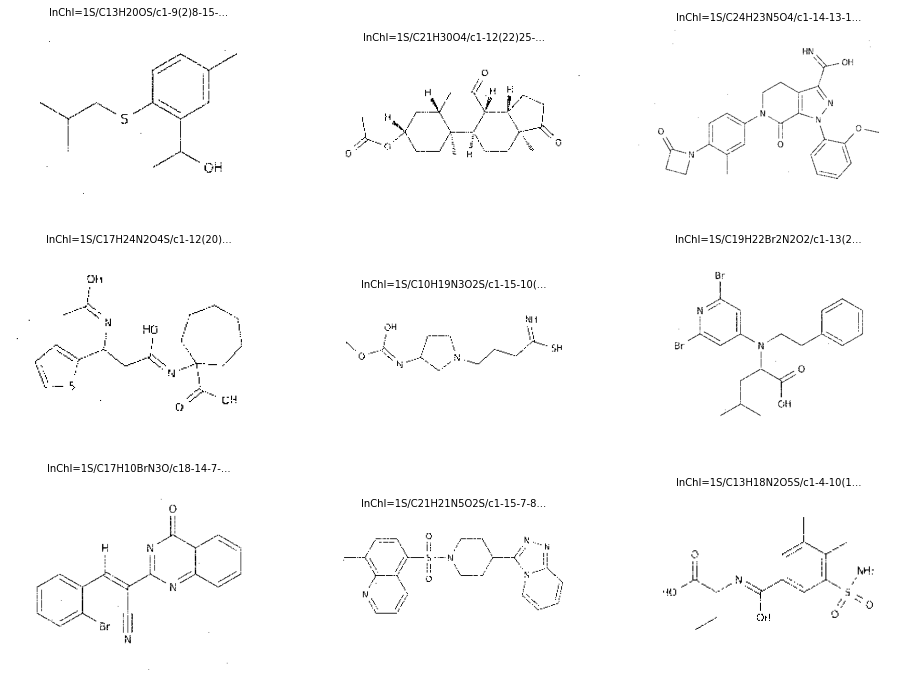

In [9]:
tmp_df = train_data_lbls[:9]
img_ids = tmp_df.index
labels = tmp_df["InChI"].values

visualize_train_batch(img_ids, labels)

Stereochemistry involves three-dimensional arrangement of atoms and molecules and the effect of this on chemical reactions.

Standard InChI distinguishes between chemical substances at the level of ‘connectivity’, ‘stereochemistry’, and ‘isotopic composition’
For example, InChI=1S/C21H30O4/c1-12(22)25-14-6-8-20(2)13(10-14)11-17(23)19-15-4-5-18(24)21(15,3)9-7-16(19)20/h13-16,19H,4-11H2,1-3H3/t13-,14+,15+,16-,19-,20+,21+/m1/s1 is an InChI label where stereochemistry information begins from /t.

/t is the sublayer for tetrahedral centers, complemented by two indicator stereo layers '/m1' and '/s1'. /m1 means that the selected one has the inverse arrangement. /s1 means there is absolute stereochemistry. Which is basically the spatial arrangement of atoms or groups in a chemical compound about an asymmetric atom, and such compounds are called Chiral compounds.

A double-bond stereochemical layer is represented by '/b'. The next layer is the isotopic layer represented by '/i'. Here "/i29 + 1" signifies, the atomic number 29 has isotope with mass increased by unity with respect to the natural value.
The "FixedH" layer represented by '/f', lists the exact position of tautomeric hydrogens.

Similarly different flags represent different chemical characteristics.

In [10]:
tmp_df = train_data_lbls.sample(2000)
h_shape = []
w_shape = []
for img_id in tmp_df.index:
    image = cv2.imread(get_img_path(img_id))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    h_shape.append(image.shape[0])
    w_shape.append(image.shape[1])

Plotting the data size dynamics based on its Area, Height anf Width.

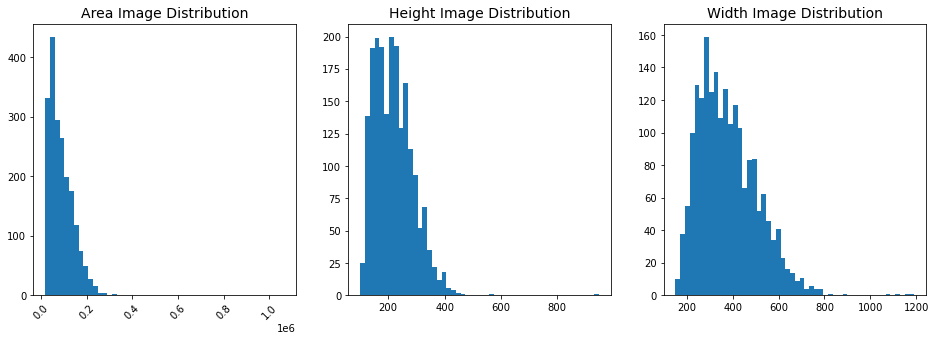

In [11]:
plot.figure(figsize=(16, 5))
plot.subplot(1, 3, 1)
plot.hist(np.array(h_shape) * np.array(w_shape), bins=50)
plot.xticks(rotation=45)
plot.title("Area Image Distribution", fontsize=14)
plot.subplot(1, 3, 2)
plot.hist(h_shape, bins=50)
plot.title("Height Image Distribution", fontsize=14)
plot.subplot(1, 3, 3)
plot.hist(w_shape, bins=50)
plot.title("Width Image Distribution", fontsize=14);

As per the plots above we can see that majority of the chemical images have area between 0.0 - 0.2. Noticing the height and width histogram plots it is quiet evident that majority of images have more width (ranging from 100-800) than height (ranging from 50-450)